In [ ]:
%pip install librosa matplotlib scipy

/var/folders/3p/00fys0v91nv0c3gjwlnx9np00000gn/T/ipykernel_89480/1587975450.py:13: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=None)
/opt/homebrew/Cellar/jupyterlab/4.1.6/libexec/lib/python3.12/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/var/folders/3p/00fys0v91nv0c3gjwlnx9np00000gn/T/ipykernel_89480/1587975450.py:18: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')


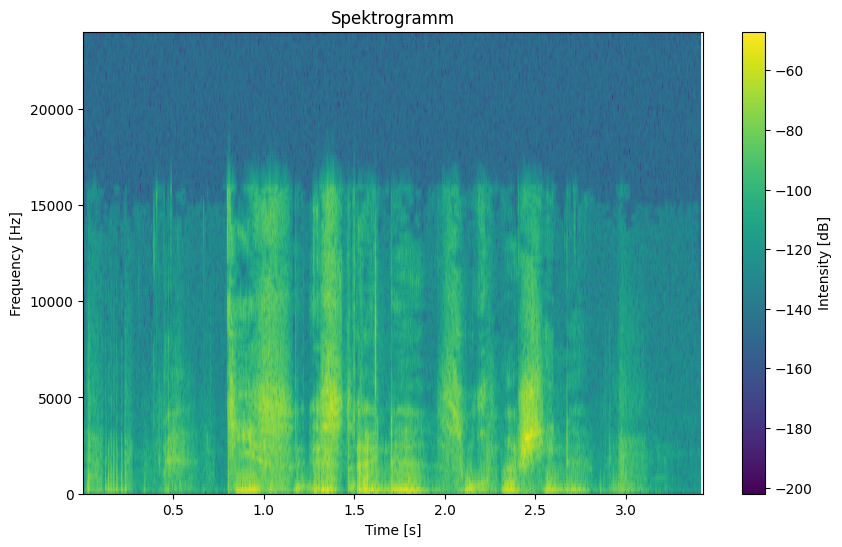

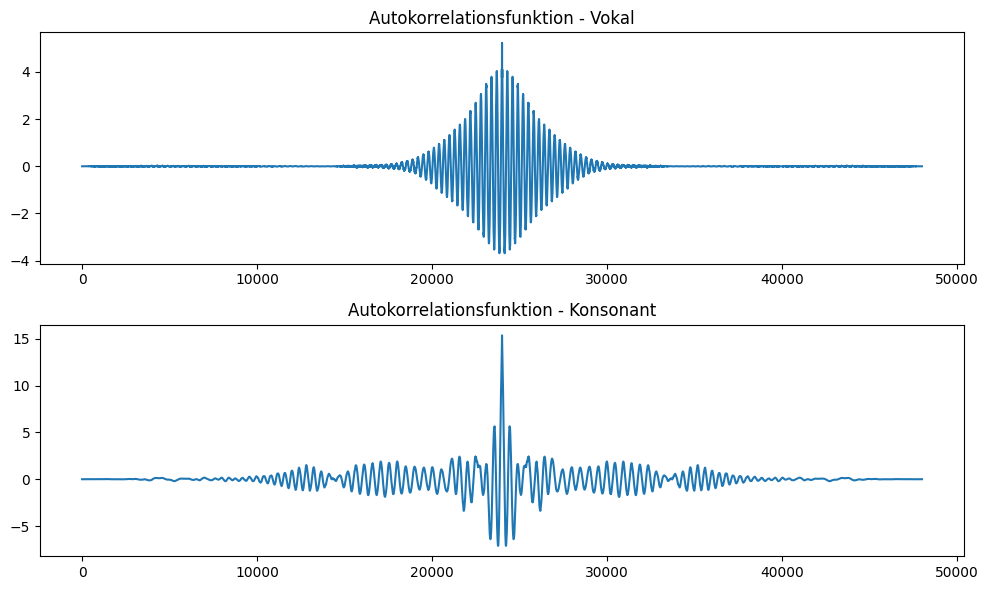

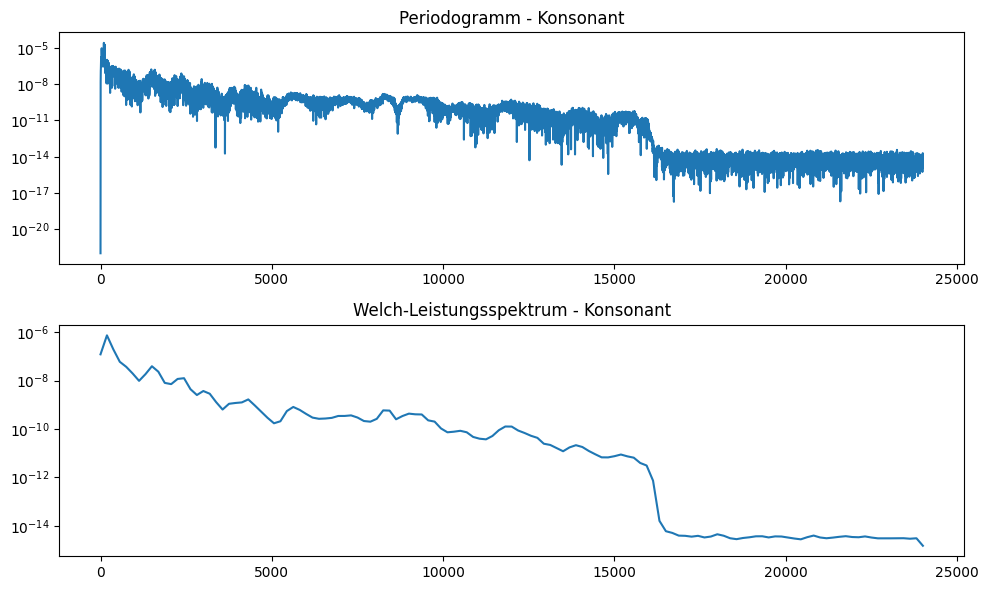

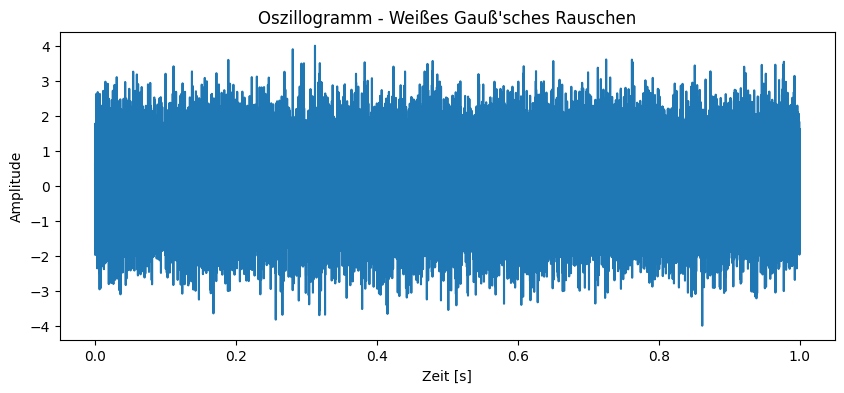

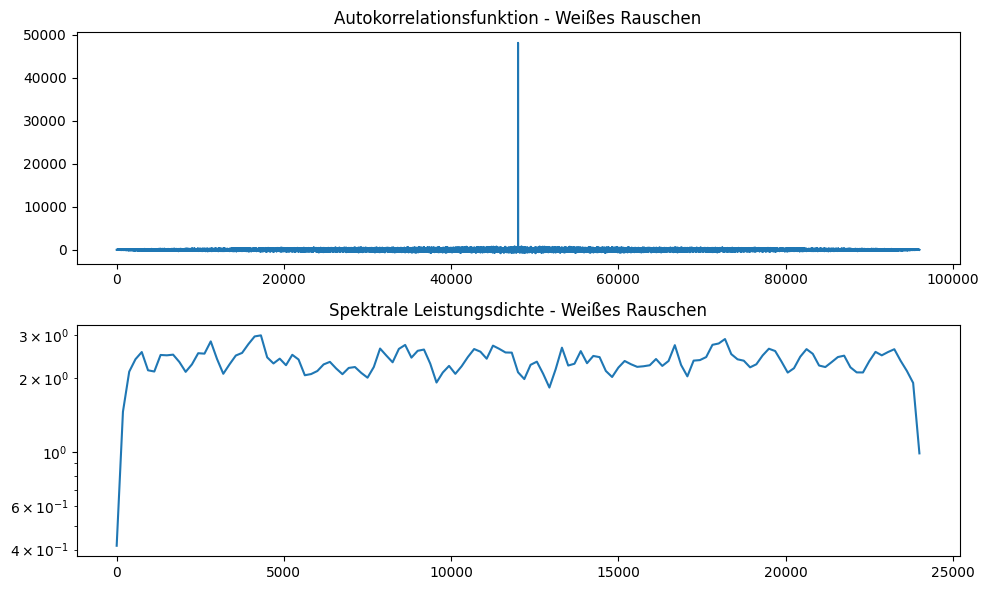

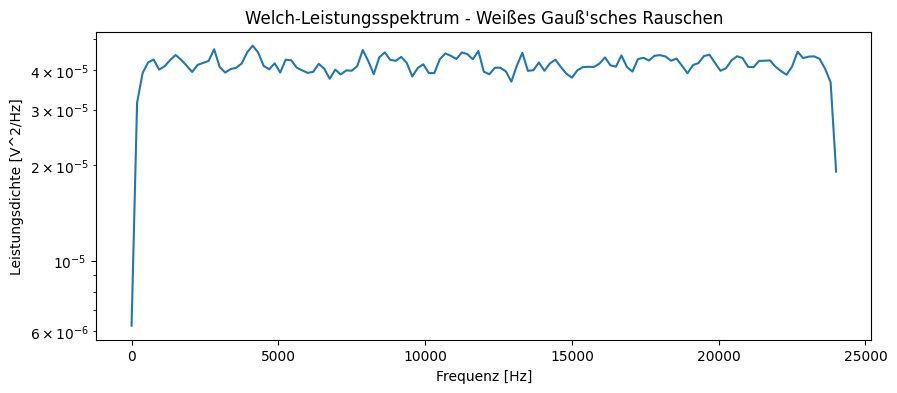

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram, welch, periodogram, correlate
from scipy.fftpack import fft

# Aufgaben a) bis f)

# Laden der Audiodatei
import librosa

audio_path = 'Labor4.m4a'
y, sr = librosa.load(audio_path, sr=None)

# a) Berechnen und plotten Sie das Spektrogramm
frequencies, times, Sxx = spectrogram(y, sr, nperseg=256)
plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.title('Spektrogramm')
plt.colorbar(label='Intensity [dB]')
plt.show()

# b) Extrahieren Sie ein Vokal- und Konsonantensegment und berechnen Sie die AKF
# Annehmen, dass der Vokal zwischen 0.5s und 1.0s ist und der Konsonant zwischen 1.5s und 2.0s
vowel_segment = y[int(0.5*sr):int(1.0*sr)]
consonant_segment = y[int(1.5*sr):int(2.0*sr)]

vowel_akf = correlate(vowel_segment, vowel_segment, mode='full')
consonant_akf = correlate(consonant_segment, consonant_segment, mode='full')

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(vowel_akf)
plt.title('Autokorrelationsfunktion - Vokal')
plt.subplot(2, 1, 2)
plt.plot(consonant_akf)
plt.title('Autokorrelationsfunktion - Konsonant')
plt.tight_layout()
plt.show()

# c) Periodogramm und Welch-Leistungsspektrum eines Konsonanten
frequencies, power_spec = periodogram(consonant_segment, sr)
frequencies_welch, power_spec_welch = welch(consonant_segment, sr, nperseg=256)

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.semilogy(frequencies, power_spec)
plt.title('Periodogramm - Konsonant')
plt.subplot(2, 1, 2)
plt.semilogy(frequencies_welch, power_spec_welch)
plt.title('Welch-Leistungsspektrum - Konsonant')
plt.tight_layout()
plt.show()

# d) Modellieren von weißem Gauß'schen Rauschen
mu, sigma = 0, 1
noise = np.random.normal(mu, sigma, sr)  # 1s Rauschen mit Abtastrate sr
time = np.linspace(0, 1, sr)

plt.figure(figsize=(10, 4))
plt.plot(time, noise)
plt.title('Oszillogramm - Weißes Gauß\'sches Rauschen')
plt.xlabel('Zeit [s]')
plt.ylabel('Amplitude')
plt.show()

# e) AKF des weißen Rauschens und Spektrale Leistungsdichte
noise_akf = correlate(noise, noise, mode='full')
frequencies_noise_akf, power_spec_noise_akf = welch(noise_akf, sr, nperseg=256)

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(noise_akf)
plt.title('Autokorrelationsfunktion - Weißes Rauschen')
plt.subplot(2, 1, 2)
plt.semilogy(frequencies_noise_akf, power_spec_noise_akf)
plt.title('Spektrale Leistungsdichte - Weißes Rauschen')
plt.tight_layout()
plt.show()

# f) Welch-Leistungsspektrum des weißen Gauß'schen Rauschens
frequencies_noise_welch, power_spec_noise_welch = welch(noise, sr, nperseg=256)

plt.figure(figsize=(10, 4))
plt.semilogy(frequencies_noise_welch, power_spec_noise_welch)
plt.title('Welch-Leistungsspektrum - Weißes Gauß\'sches Rauschen')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Leistungsdichte [V^2/Hz]')
plt.show()
